In [1]:
import random
from QGrad import Value, draw_dot


In [2]:
class Neuron:
    def __init__(self, nin):
        self.weights = [Value(random.uniform(-1,1), _label= 'w') for _ in range(nin)]
        self.bias    = Value(random.uniform(-1,1), _label= 'b')
    
    def __call__(self, x):
        activation = sum([wi*xi for wi,xi in zip(self.weights, x)],self.bias)
        out =activation.tanh()
        return out
    
    def parameters(self):
        return self.weights + [self.bias]



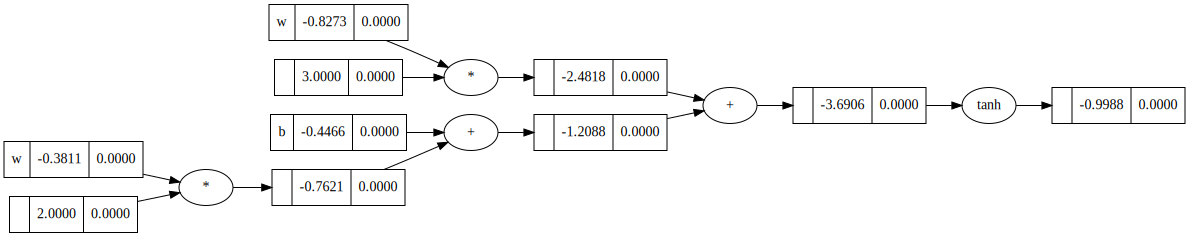

In [3]:
n = Neuron(2)
draw_dot(n([2,3]))

In [4]:
class Layer:
    def __init__(self,nin,nout):
        self.neurons= [Neuron(nin) for _ in range(nout)]

    def __call__(self,x):
        outs = [neuron(x) for neuron in self.neurons]
        return outs[0] if len(outs) ==1 else outs
        
    def parameters(self):
        return [n for neuron in self.neurons for n in neuron.parameters() ]
        

In [5]:
class MLP:
    def __init__(self,nin,nouts):
        sz= [nin]+nouts #prepending the nin to nouts list
        self.layers= [Layer(sz[i],sz[i+1]) for i in range(len(nouts))]


    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [neurons for layer in self.layers for neurons in layer.parameters() ]
    
    def step(self ,step):
        for p in self.parameters():
            p.data += -step*p.grad

    def MSE(self, Y, predictions):
        loss = sum([(ypred-ygt)**2 for ypred,ygt in zip(predictions, Y)])
        return loss

        

In [15]:
mlp = MLP(3,[4,4,4,3,3,1])
len(MLP(3,[4,4,1]).parameters())

41

In [31]:
mlp = MLP(3,[4,4,4,3,3,2,2,1])


In [17]:
# Hardcoded dataset
X =          [[-0.01730827, -1.2898292 ,  1.60769588],
              [ 1.32725432,  0.72889926, -0.83313705],
              [ 0.42927829,  0.85735216, -0.02675259],
              [ 1.43592478,  1.58494998, -0.25493666],
              [ 0.0201066 ,  1.30760039, -0.92018987],
              [ 2.49089098,  1.54709883,  0.72018486],
              [ 0.33691153,  1.49797541,  0.23013534],
              [ 1.45671832, -0.74459119, -0.16556894],
              [-0.12873861,  1.08279529, -0.25456551],
              [ 0.07163872, -0.98536853, -0.57654511]]
Y = [-1,1,-1,1,-1,1,-1,1,-1,1]

# Pass the dataset through the MLP
outputs_binary = [mlp(x) for x in X]
print(outputs_binary)
print(Y)
loss = sum([(ypred-ygt)**2 for ypred,ygt in zip(outputs_binary, Y)])
loss

[Value(data=-0.9052702679539513), Value(data=-0.6954937460605222), Value(data=-0.8030159623429425), Value(data=-0.6653297024167577), Value(data=-0.8399355687454138), Value(data=-0.6273320161847562), Value(data=-0.6940530384115723), Value(data=-0.7471421261842447), Value(data=-0.834371230875961), Value(data=-0.7304164431883206)]
[-1, 1, -1, 1, -1, 1, -1, 1, -1, 1]


Value(data=14.537511715370677)

In [18]:
def train(x =X , y= Y, model = mlp ,step = .05, epoch = 10):
    for e in range(epoch):

        #forward pass
        predictions = [model(xi) for xi in x]
        loss = model.MSE(y ,predictions)
        
        #torch.zerograd()
        for p in model.parameters():
            p.grad = 0.0
            
        #back propagation
        loss.backwards()
        model.step(step)
        
            

        print(f"epoch : {e}   Loss : {loss.data}")        


In [19]:

train(epoch=20)

epoch : 0   Loss : 14.537511715370677
epoch : 1   Loss : 9.678640081332771
epoch : 2   Loss : 9.772587068975414
epoch : 3   Loss : 8.7341806292444
epoch : 4   Loss : 5.857764385974075
epoch : 5   Loss : 1.909308779865857
epoch : 6   Loss : 1.05756744273997
epoch : 7   Loss : 0.35550815563765215
epoch : 8   Loss : 0.12199207381914692
epoch : 9   Loss : 0.10512223166161097
epoch : 10   Loss : 0.0933829651799154
epoch : 11   Loss : 0.08441000269368164
epoch : 12   Loss : 0.07719884476566194
epoch : 13   Loss : 0.07121829893637002
epoch : 14   Loss : 0.06614867437720062
epoch : 15   Loss : 0.06178065198712532
epoch : 16   Loss : 0.05796889154647074
epoch : 17   Loss : 0.054608037060134174
epoch : 18   Loss : 0.051619164986752286
epoch : 19   Loss : 0.048941600181939035


In [20]:
mlp([-0.017, -1. ,  1.])

Value(data=-0.9060815738291783)

In [34]:
len(mlp.parameters())

100

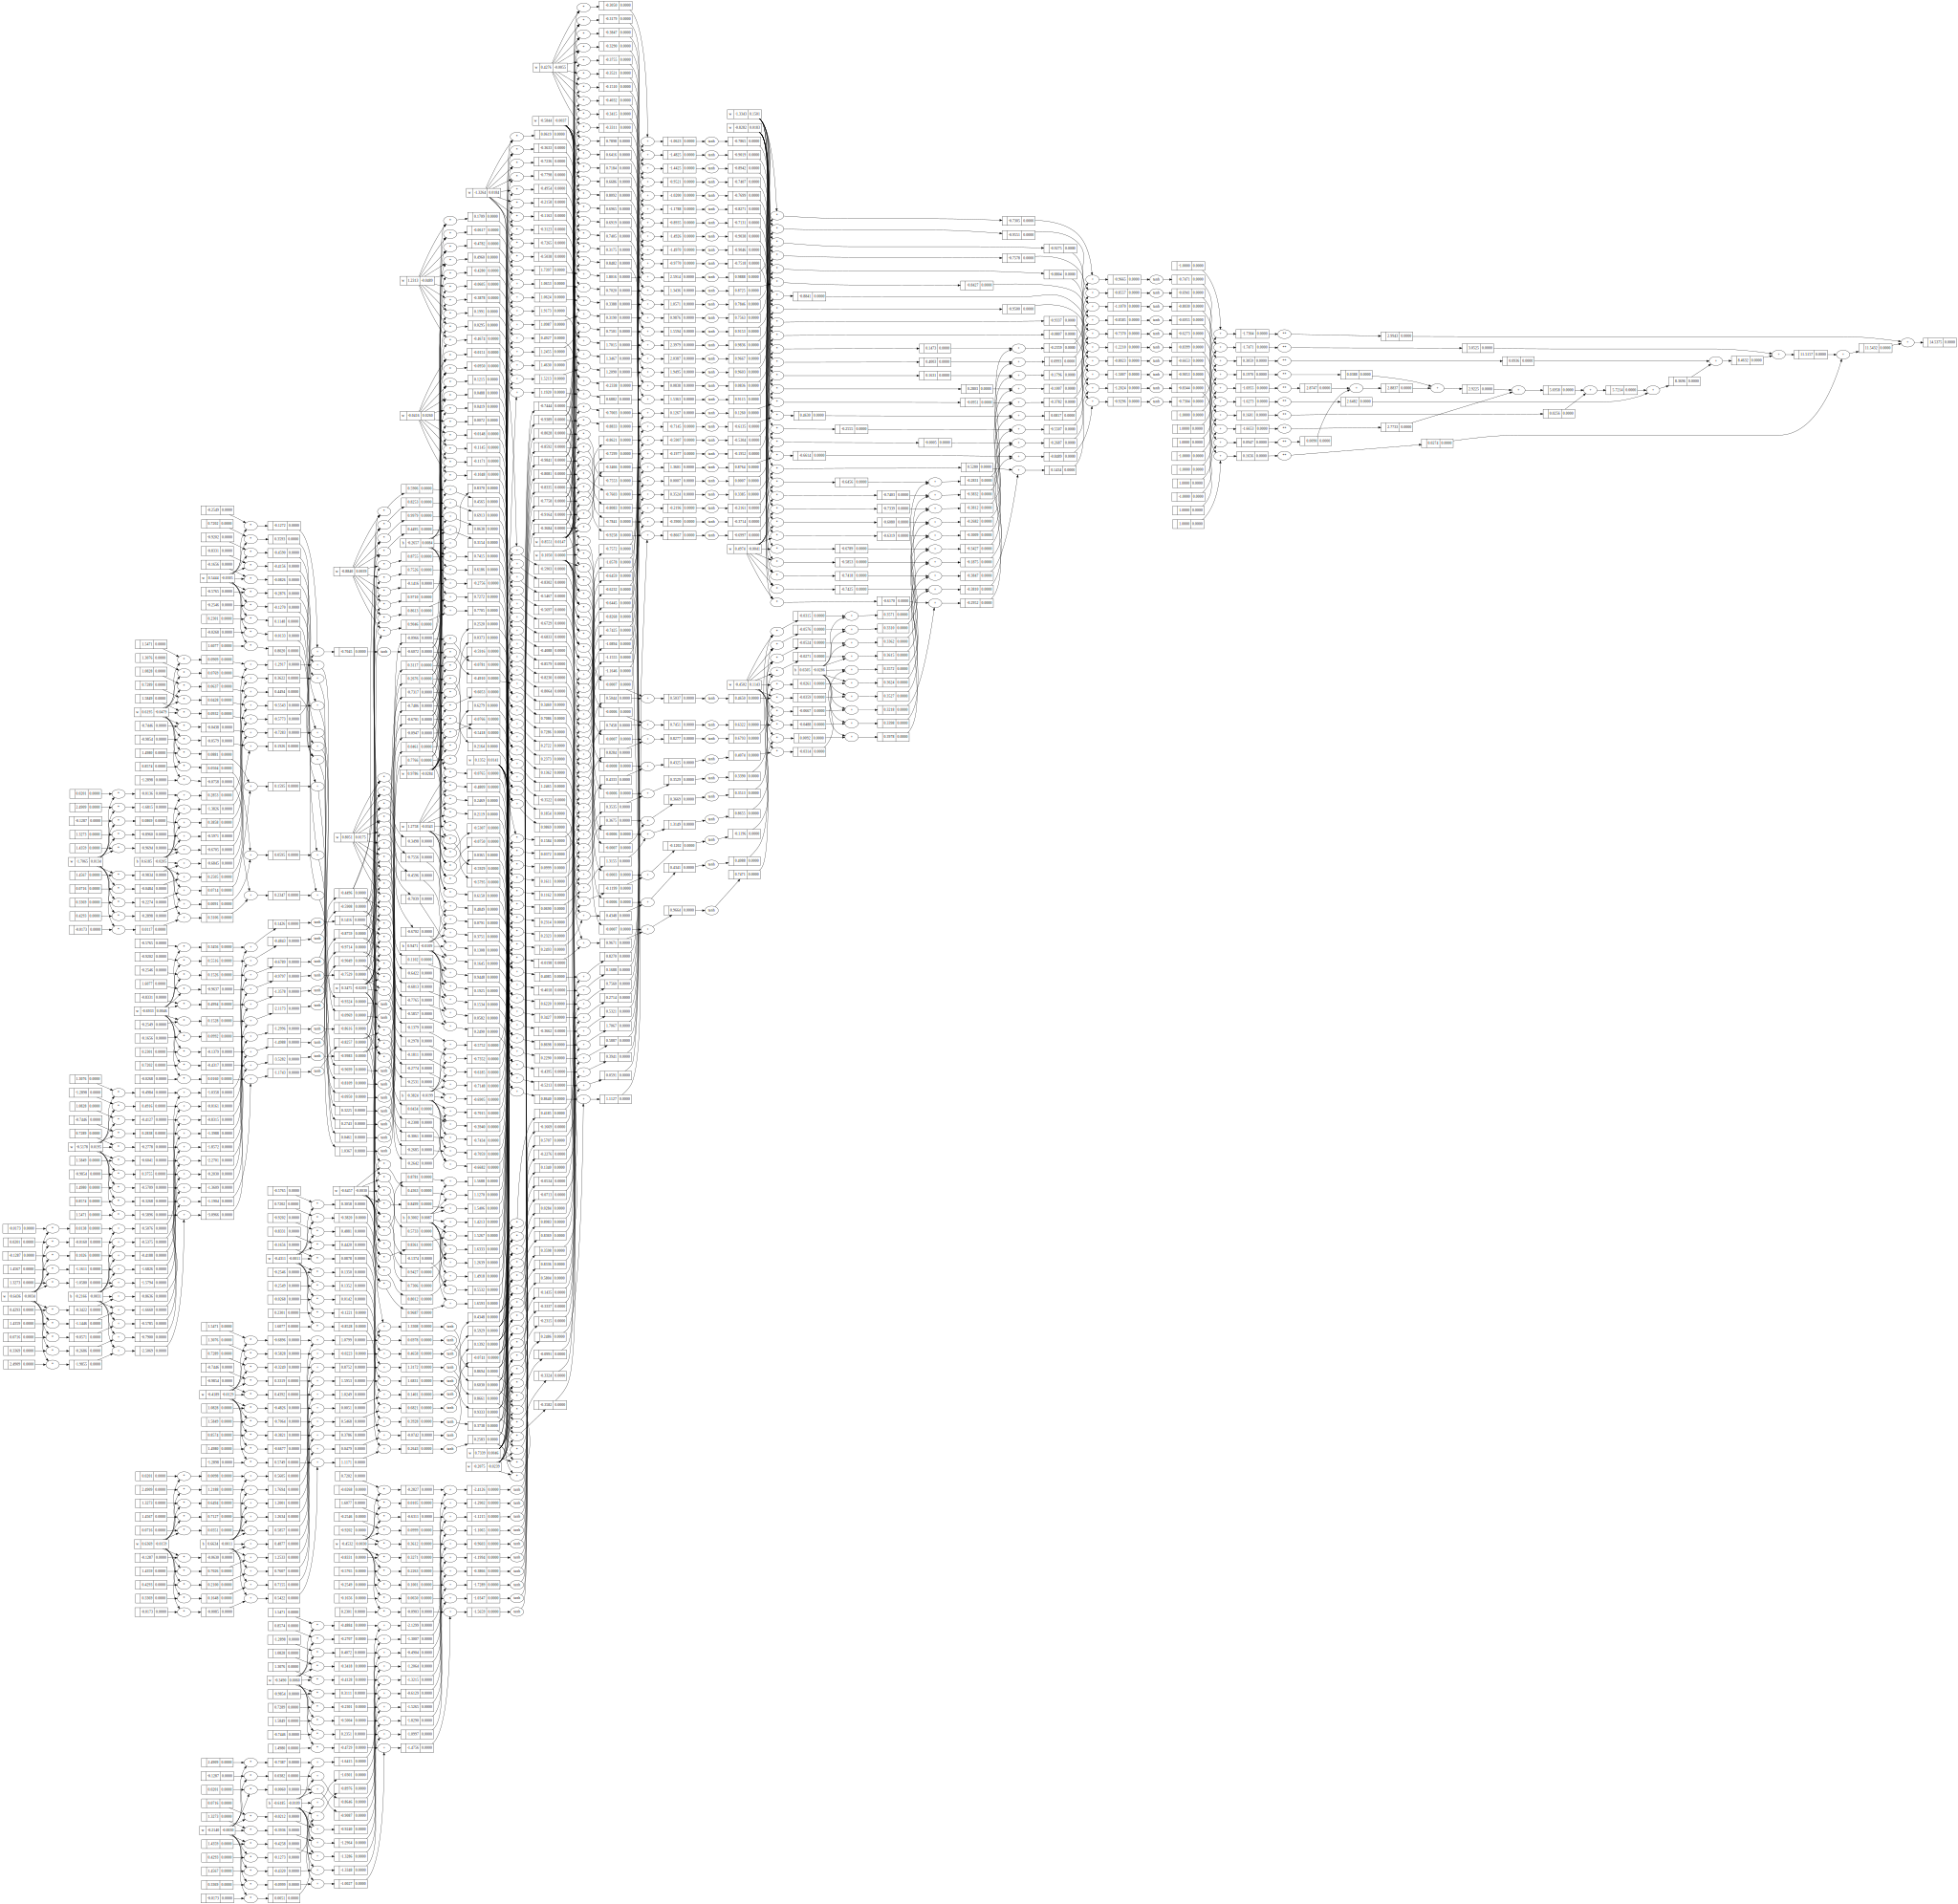

In [35]:
draw_dot(loss)